In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Pearson: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

## **Obtenção do dataset**

In [3]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [4]:
house = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['Price'])

house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## **Explorando os dados**

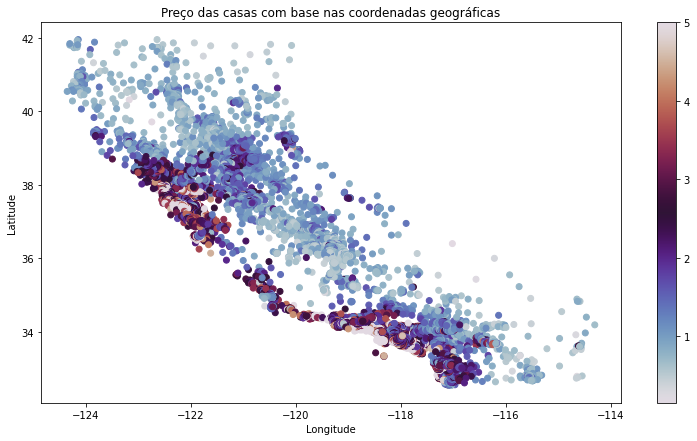

In [5]:
plt.figure(figsize=(13,7))

plt.scatter(house['Longitude'],house['Latitude'],c=house['Price'],cmap='twilight')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Preço das casas com base nas coordenadas geográficas')
plt.show()

Percebe-se uma faixa de residências relativamente mais caras do que as demais.

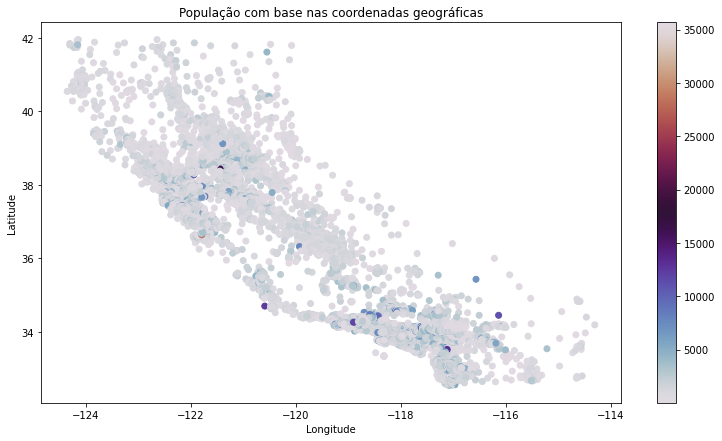

In [6]:
plt.figure(figsize=(13,7))

plt.scatter(house['Longitude'],house['Latitude'],c=house['Population'],cmap='twilight')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('População com base nas coordenadas geográficas')
plt.show()

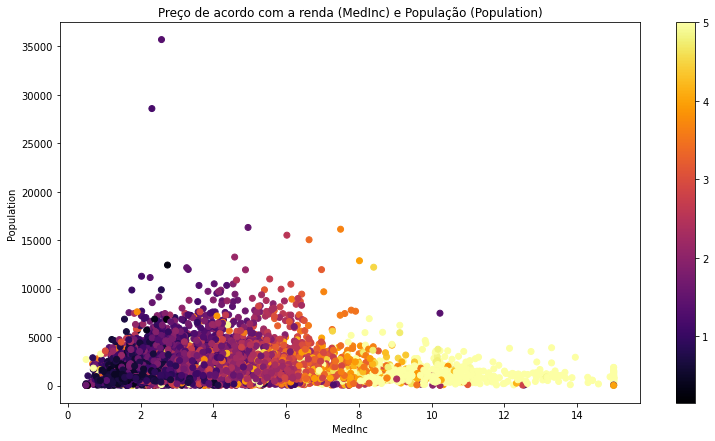

In [7]:
plt.figure(figsize=(13,7))

plt.scatter(house['MedInc'],house['Population'],c=house['Price'],cmap='inferno')
plt.colorbar()
plt.xlabel('MedInc')
plt.ylabel('Population')
plt.title('Preço de acordo com a renda (MedInc) e População (Population)')
plt.show()

Percebe-se que imóveis mais caros tendem a estar localizados em regiões com nível menor de população e mais alto de renda.

## **Dividindo por faixa de preço**

In [8]:
p0_1 = house.loc[house["Price"]<=1]
p1_2 = house.loc[(house["Price"]>1) & (house["Price"]<=2)]
p2_3 = house.loc[(house["Price"]>2) & (house["Price"]<=3)]
p3_4 = house.loc[(house["Price"]>3) & (house["Price"]<=4)]
p4_ = house.loc[house["Price"]>4]

In [9]:
f0_1 = pd.DataFrame.copy(p0_1)
f1_2 = pd.DataFrame.copy(p1_2)
f2_3 =pd.DataFrame.copy(p2_3)
f3_4 = pd.DataFrame.copy(p3_4)
f4_ = pd.DataFrame.copy(p4_)

In [10]:
f0_1.loc[:,"Price"] = "0-1"
f1_2.loc[:,"Price"] = "1-2"
f2_3.loc[:,"Price"] = "2-3"
f3_4.loc[:,"Price"] = "3-4"
f4_.loc[:,"Price"] = "4+"

In [11]:
new = pd.concat([f0_1, f1_2, f2_3, f3_4, f4_])
new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
23,2.1806,52.0,5.193846,1.036923,853.0,2.624615,37.84,-122.27,0-1
26,2.4597,49.0,4.728033,1.020921,607.0,2.539749,37.85,-122.28,0-1
35,1.4861,49.0,4.602273,1.068182,570.0,2.159091,37.83,-122.27,0-1
51,1.5045,43.0,4.589681,1.120393,1061.0,2.606880,37.82,-122.27,0-1
52,1.1108,41.0,4.473611,1.184722,1959.0,2.720833,37.82,-122.27,0-1


## **Estatísticas por faixa de preço**

*   Faixa 0 - 1




In [12]:
f0_1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,2.305806,28.717332,5.194322,1.150675,1204.599235,3.238758,36.665571,-119.787613
std,0.788925,11.570257,2.301823,0.545751,834.243077,9.906332,2.317724,2.091442
min,0.499900,1.000000,1.629630,0.444444,8.000000,0.692308,32.540000,-124.350000
25%,1.729725,19.000000,4.404579,1.018365,701.000000,2.533427,34.172500,-121.450000
50%,2.200950,29.000000,4.991016,1.070811,1052.000000,2.945085,36.750000,-119.780000
75%,2.753750,37.000000,5.575051,1.139833,1496.750000,3.492995,38.520000,-118.250000
max,7.575200,52.000000,62.422222,15.312500,12427.000000,599.714286,41.950000,-114.310000


In [13]:
calcula_estatisticas(f0_1["MedInc"])

Media: 2.31
Moda: 2.2
Mediana: 1.62
Variância: 0.62
Desvio Padrão: 0.79
Coeficiente Pearson: 0.73
Coeficiente de Kurtosi: 1.04


In [14]:
calcula_estatisticas(f0_1["AveOccup"])

Media: 3.24
Moda: 2.95
Mediana: 3.0
Variância: 98.11
Desvio Padrão: 9.9
Coeficiente Pearson: 59.7
Coeficiente de Kurtosi: 3592.12


*   Faixa 1 - 2

In [15]:
f1_2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000
mean,3.298047,27.422579,5.194586,1.104279,1538.775777,3.300438,35.448873,-119.301280
std,1.074415,12.522150,2.615580,0.534196,1256.571115,13.728959,2.171548,1.937596
min,0.499900,1.000000,0.846154,0.500000,6.000000,0.970588,32.550000,-124.300000
25%,2.532600,17.000000,4.251073,1.006119,828.000000,2.538150,33.910000,-121.310000
50%,3.211500,28.000000,5.000000,1.048421,1249.000000,2.969466,34.120000,-118.290000
75%,4.008000,36.000000,5.734848,1.100295,1870.000000,3.543093,37.780000,-117.900000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-115.390000


In [16]:
calcula_estatisticas(f1_2["MedInc"])

Media: 3.3
Moda: 3.21
Mediana: 3.38
Variância: 1.15
Desvio Padrão: 1.07
Coeficiente Pearson: 0.67
Coeficiente de Kurtosi: 2.95


In [17]:
calcula_estatisticas(f1_2["AveOccup"])

Media: 3.3
Moda: 2.97
Mediana: 2.0
Variância: 188.46
Desvio Padrão: 13.73
Coeficiente Pearson: 89.13
Coeficiente de Kurtosi: 8044.03


*   Faixa 2 - 3

In [18]:
f2_3.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000
mean,4.338847,28.400369,5.429789,1.061470,1508.227991,2.839654,35.349278,-119.651952
std,1.310934,12.444952,1.750214,0.268911,1132.977735,3.331021,1.897882,1.993511
min,0.536000,2.000000,1.378486,0.333333,5.000000,1.089268,32.560000,-123.810000
25%,3.359400,18.000000,4.576961,1.001397,840.000000,2.405787,33.870000,-121.950000
50%,4.282000,28.000000,5.410319,1.040380,1235.000000,2.771247,34.190000,-118.460000
75%,5.266800,36.000000,6.155709,1.083333,1814.000000,3.121528,37.480000,-118.020000
max,12.500000,52.000000,56.269231,11.410714,15507.000000,230.172414,39.340000,-114.620000


In [19]:
calcula_estatisticas(f2_3["MedInc"])

Media: 4.34
Moda: 4.28
Mediana: 4.12
Variância: 1.72
Desvio Padrão: 1.31
Coeficiente Pearson: 0.22
Coeficiente de Kurtosi: 0.14


In [20]:
calcula_estatisticas(f2_3["AveOccup"])

Media: 2.84
Moda: 2.77
Mediana: 2.5
Variância: 11.09
Desvio Padrão: 3.33
Coeficiente Pearson: 65.31
Coeficiente de Kurtosi: 4450.98


*   Faixa 3 - 4

In [21]:
f3_4.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000
mean,5.230008,30.132887,5.870976,1.059724,1381.857075,2.850538,35.471396,-119.886582
std,1.708177,13.386665,1.675900,0.173684,1185.470590,10.944251,1.875170,2.014985
min,0.536000,2.000000,1.678571,0.764706,3.000000,0.750000,32.660000,-123.000000
25%,3.972575,19.000000,4.823071,1.000000,778.000000,2.250306,33.930000,-122.080000
50%,5.168600,30.000000,5.866146,1.038732,1122.000000,2.572460,34.200000,-118.540000
75%,6.427075,40.000000,6.749440,1.084522,1591.000000,2.906331,37.550000,-118.220000
max,15.000100,52.000000,36.075472,5.273585,16122.000000,502.461538,39.190000,-116.250000


In [22]:
calcula_estatisticas(f3_4["MedInc"])

Media: 5.23
Moda: 5.17
Mediana: 4.12
Variância: 2.92
Desvio Padrão: 1.71
Coeficiente Pearson: 0.29
Coeficiente de Kurtosi: 0.61


In [23]:
calcula_estatisticas(f3_4["AveOccup"])

Media: 2.85
Moda: 2.57
Mediana: 3.0
Variância: 119.72
Desvio Padrão: 10.94
Coeficiente Pearson: 45.51
Coeficiente de Kurtosi: 2074.96


*   Faixa 4 -

In [24]:
f4_.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,6.930557,33.125573,6.500844,1.090034,1172.410550,2.537532,35.313784,-119.776049
std,2.958955,13.139035,3.899916,0.656001,842.221601,1.172829,1.824523,1.983526
min,0.499900,2.000000,1.824719,0.500000,13.000000,1.066176,32.630000,-122.710000
25%,4.644850,24.000000,5.199306,1.007421,675.750000,2.116464,33.970000,-122.130000
50%,6.583550,34.000000,6.465204,1.047356,968.000000,2.507895,34.140000,-118.480000
75%,8.577975,43.000000,7.530032,1.094763,1461.500000,2.833136,37.440000,-118.290000
max,15.000100,52.000000,141.909091,25.636364,12203.000000,41.214286,39.010000,-116.430000


In [25]:
calcula_estatisticas(f4_["MedInc"])

Media: 6.93
Moda: 6.58
Mediana: 15.0
Variância: 8.75
Desvio Padrão: 2.96
Coeficiente Pearson: 0.66
Coeficiente de Kurtosi: 0.19


In [26]:
calcula_estatisticas(f4_["AveOccup"])

Media: 2.54
Moda: 2.51
Mediana: 2.5
Variância: 1.37
Desvio Padrão: 1.17
Coeficiente Pearson: 21.85
Coeficiente de Kurtosi: 686.11


## **Mais gráficos interessantes**

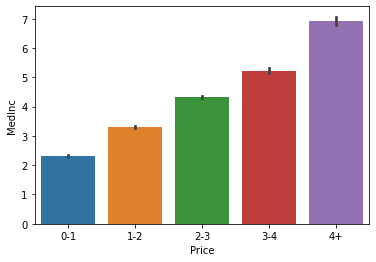

In [27]:
sns.barplot(x="Price", y="MedInc", data=new)

Maiores faixas de preço estão associadas a maiores níveis de renda

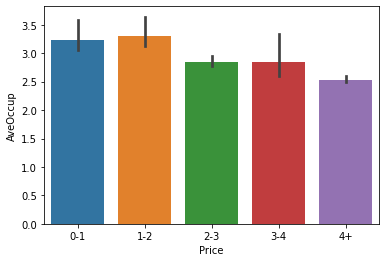

In [28]:
sns.barplot(x="Price", y="AveOccup", data=new)

A faixa de preço 4+ aponta menor nível médio de ocupação.

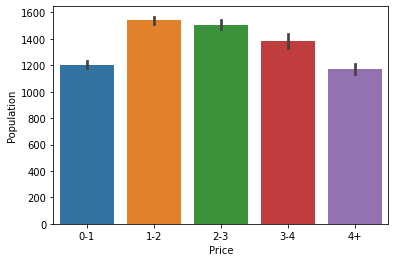

In [29]:
sns.barplot(x="Price", y="Population", data=new)

A faixa 4+ apresenta menor nível populacional.

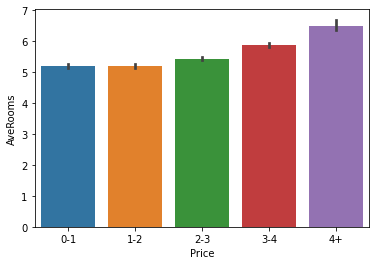

In [30]:
sns.barplot(x="Price", y="AveRooms", data=new)

A faixa 4+ apresenta maior quantidade média de quartos.

Distribuições

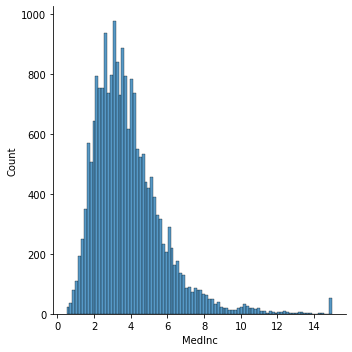

In [31]:
sns.displot(house["MedInc"])

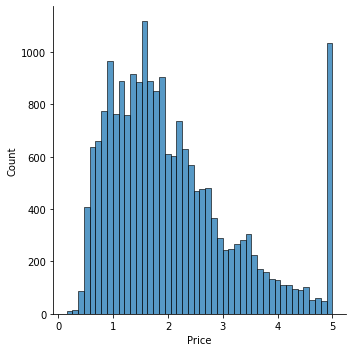

In [32]:
sns.displot(house["Price"])

*   O dataset trabalhado é interessante para modelos de regressão.
*   Analisou-se o comportamento dos atributos para cada faixa de preço, isso auxilia na percepção de características que possam viabilizar a tarefa de regressão.